In [ ]:
!pip install -q -U tensorflow>=1.8.0
!pip install keras-visualizer
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, time

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

**Data Loading and Preprocessing**

In [ ]:
dataset = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True).item()

In [ ]:
X = dataset['features']
y = dataset['target']

In [ ]:
X.shape, y.shape

((60000, 28, 28), (60000,))

In [ ]:
y

array([5., 2., 1., ..., 3., 1., 4.])

In [ ]:
y = y-1

In [ ]:
y

array([4., 1., 0., ..., 2., 0., 3.])

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 5)

In [ ]:
y

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y.shape

(60000, 5)

**Train-Val-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# train - val - test split (80%-10%-10% , random seed =0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [ ]:
X_train = tf.expand_dims(X_train, axis=-1)
X_val = tf.expand_dims(X_val, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

(TensorShape([48000, 28, 28, 1]),
 TensorShape([6000, 28, 28, 1]),
 TensorShape([6000, 28, 28, 1]))

**CNN Model**

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from keras_visualizer import visualizer


In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
CHANNEL = 1
NUM_CLASSES = 5
TEST_SIZE = 0.2
RANDOM_STATE = 0

#Model
EPOCHS = 50
BATCH_SIZE = 128

**Model 1**

In [ ]:
# Model 1
model1 = Sequential()
# Add convolution 2D
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(5, activation='softmax'))


model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

**Model 2**

In [ ]:
# Model 2
model2 = Sequential()
# Add convolution 2D
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model2.add(BatchNormalization(axis=-1))
model2.add(Dropout(0.25))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization(axis=-1))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(5, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

**Model 3**

In [ ]:
# Model 3

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(28,28,1)))
model3.add(BatchNormalization())

model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))

model3.add(Dense(5, activation='softmax'))



model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)       

**Model 4**

In [ ]:
from keras import regularizers

# Model 4 Conv (Best Model)

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), 
                  padding='same',
                  activation='relu',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(0.0001), 
                  input_shape=(28,28,1)))
model4.add(BatchNormalization())

model4.add(Conv2D(32, kernel_size=(3, 3), 
                  padding='same',
                  kernel_regularizer=regularizers.l2(0.0001),
                  activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(64, kernel_size=(3, 3), 
                  padding='same',
                  kernel_regularizer=regularizers.l2(0.0001),
                  activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Conv2D(128, kernel_size=(3, 3),
                  padding='same',
                  kernel_regularizer=regularizers.l2(0.0001),
                  activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.4))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(5, activation='softmax'))



model4.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
#visualizer(model4, format='png', view=True)

In [ ]:
# from keras import regularizers

# # Model 4 Conv (Best Model 1)

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  kernel_initializer='he_normal',
#                  kernel_regularizer=regularizers.l2(), 
#                  input_shape=(28,28,1)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, kernel_size=(3, 3), 
#                  kernel_regularizer=regularizers.l2(),
#                  activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3, 3), 
#                  kernel_regularizer=regularizers.l2(),
#                  activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3),
#                  kernel_regularizer=regularizers.l2(),
#                  activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(5, activation='softmax'))



# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(),
#               metrics=['accuracy'])

In [ ]:
# from keras import regularizers

# # Model 4 Conv

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.0001), input_shape=(28,28,1)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0001),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0001),activation='relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(128, kernel_size=(3, 3),padding='same',kernel_regularizer=regularizers.l2(0.0001),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(5, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(),
#               metrics=['accuracy'])

**Train Model**

In [ ]:
# Train the the model
start_time = time.time()
train_model1 = model1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/50
375/375 [==============================] - 35s 7ms/step - loss: 0.7581 - accuracy: 0.6838 - val_loss: 0.4553 - val_accuracy: 0.8210
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4015 - accuracy: 0.8358 - val_loss: 0.3746 - val_accuracy: 0.8432
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3230 - accuracy: 0.8691 - val_loss: 0.3157 - val_accuracy: 0.8743
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2703 - accuracy: 0.8913 - val_loss: 0.2874 - val_accuracy: 0.8862
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2388 - accuracy: 0.9044 - val_loss: 0.2788 - val_accuracy: 0.8877
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2212 - accuracy: 0.9107 - val_loss: 0.2978 - val_accuracy: 0.8822
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1986 - accuracy: 0.9189 - val_loss: 0.2740 - val_accuracy: 0.8938
Epoch

In [ ]:
# Train the the model
start_time = time.time()
train_model2 = model2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/50
375/375 [==============================] - 4s 8ms/step - loss: 0.8215 - accuracy: 0.6881 - val_loss: 0.6120 - val_accuracy: 0.7367
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.4511 - accuracy: 0.8164 - val_loss: 0.6658 - val_accuracy: 0.7440
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3902 - accuracy: 0.8431 - val_loss: 0.7953 - val_accuracy: 0.7192
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3459 - accuracy: 0.8617 - val_loss: 0.8897 - val_accuracy: 0.7088
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3271 - accuracy: 0.8717 - val_loss: 0.7885 - val_accuracy: 0.7278
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3178 - accuracy: 0.8730 - val_loss: 0.7953 - val_accuracy: 0.7387
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3033 - accuracy: 0.8780 - val_loss: 0.6086 - val_accuracy: 0.7822
Epoch 

In [ ]:
# Train the the model
start_time = time.time()
train_model3 = model3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/50
375/375 [==============================] - 5s 11ms/step - loss: 0.9014 - accuracy: 0.6714 - val_loss: 1.3403 - val_accuracy: 0.4745
Epoch 2/50
375/375 [==============================] - 4s 10ms/step - loss: 0.4503 - accuracy: 0.8164 - val_loss: 0.7340 - val_accuracy: 0.7390
Epoch 3/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3852 - accuracy: 0.8473 - val_loss: 0.4301 - val_accuracy: 0.8308
Epoch 4/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3475 - accuracy: 0.8633 - val_loss: 0.3778 - val_accuracy: 0.8498
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3189 - accuracy: 0.8735 - val_loss: 0.3420 - val_accuracy: 0.8677
Epoch 6/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3034 - accuracy: 0.8802 - val_loss: 0.3672 - val_accuracy: 0.8605
Epoch 7/50
375/375 [==============================] - 4s 10ms/step - loss: 0.2900 - accuracy: 0.8874 - val_loss: 0.2521 - val_accuracy: 0.8993

In [ ]:
# Train the model
start_time = time.time()
train_model4 = model4.fit(X_train, y_train,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          verbose=1,
                          validation_data=(X_val, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/50
375/375 [==============================] - 7s 15ms/step - loss: 0.9403 - accuracy: 0.6680 - val_loss: 0.5836 - val_accuracy: 0.7920
Epoch 2/50
375/375 [==============================] - 5s 14ms/step - loss: 0.4701 - accuracy: 0.8227 - val_loss: 0.3918 - val_accuracy: 0.8593
Epoch 3/50
375/375 [==============================] - 5s 14ms/step - loss: 0.4086 - accuracy: 0.8462 - val_loss: 0.3612 - val_accuracy: 0.8738
Epoch 4/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3774 - accuracy: 0.8595 - val_loss: 0.3089 - val_accuracy: 0.8870
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3519 - accuracy: 0.8756 - val_loss: 0.3246 - val_accuracy: 0.8800
Epoch 6/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3292 - accuracy: 0.8818 - val_loss: 0.4300 - val_accuracy: 0.8410
Epoch 7/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3271 - accuracy: 0.8815 - val_loss: 0.2870 - val_accuracy: 0.9017

**Performance**

Mode 1

In [ ]:
score1 = model1.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])

Train loss: 0.014090935699641705
Train accuracy: 0.9953333139419556


In [ ]:
score1 = model1.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score1[0])
print('Val accuracy:', score1[1])

Val loss: 0.691034734249115
Val accuracy: 0.893666684627533


In [ ]:
score1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.635719895362854
Test accuracy: 0.9016666412353516


Model 2

In [ ]:
score2 = model2.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Train loss: 0.122385174036026
Train accuracy: 0.9526875019073486


In [ ]:
score2 = model2.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score2[0])
print('Val accuracy:', score2[1])

Val loss: 0.25994133949279785
Val accuracy: 0.9056666493415833


In [ ]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.23331625759601593
Test accuracy: 0.9148333072662354


Model 3

In [ ]:
score3 = model3.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score3[0])
print('Train accuracy:', score3[1])

Train loss: 0.09007836878299713
Train accuracy: 0.9605208039283752


In [ ]:
score3 = model3.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score3[0])
print('Val accuracy:', score3[1])

Val loss: 0.2946113049983978
Val accuracy: 0.9024999737739563


In [ ]:
score3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.2660560607910156
Test accuracy: 0.906166672706604


Model 4

In [ ]:
score4 = model4.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score4[0])
print('Train accuracy:', score4[1])

Train loss: 0.1309977024793625
Train accuracy: 0.9674583077430725


In [ ]:
score4 = model4.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score4[0])
print('Val accuracy:', score4[1])

Val loss: 0.2542056441307068
Val accuracy: 0.9210000038146973


In [ ]:
score4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.2258574664592743
Test accuracy: 0.9284999966621399


**Accuracy - Loss Plots**

In [ ]:
def accuracy_loss_plot(model):

  hist = model.history
  acc = hist['accuracy']
  val_acc = hist['val_accuracy']
  loss = hist['loss']
  val_loss = hist['val_loss']
  epoch = range(50)

  fig = plt.figure(figsize = (12,10))
  plt.subplot(2,2,1)
  sns.lineplot(acc,loss)
  plt.xlabel('Accuracy')
  plt.ylabel('Loss')
  plt.legend(['train set'], loc='upper right')
  plt.title('Training Accuracy vs Loss')

  plt.subplot(2,2,2)
  sns.lineplot(val_acc,val_loss)
  plt.xlabel('Accuracy')
  plt.ylabel('Loss')
  plt.legend(['validation set'], loc='upper right')
  plt.title('Validation Accuracy vs Loss')

  plt.subplot(2,2,3)
  sns.lineplot(epoch, acc)
  sns.lineplot(epoch, val_acc)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train set', 'validation set'], loc='lower right')
  plt.title('Accuracy vs Epoch')

  plt.subplot(2,2,4)
  sns.lineplot(epoch, loss)
  sns.lineplot(epoch, val_loss)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['train set', 'validation set'], loc='upper right')
  plt.title('Loss vs Epoch')

  plt.show()



Model 1

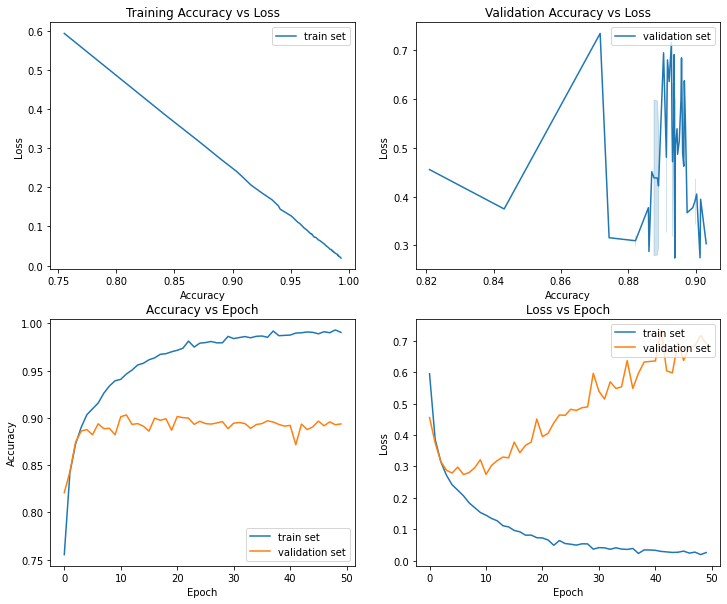

In [ ]:
accuracy_loss_plot(train_model1)

Model 2

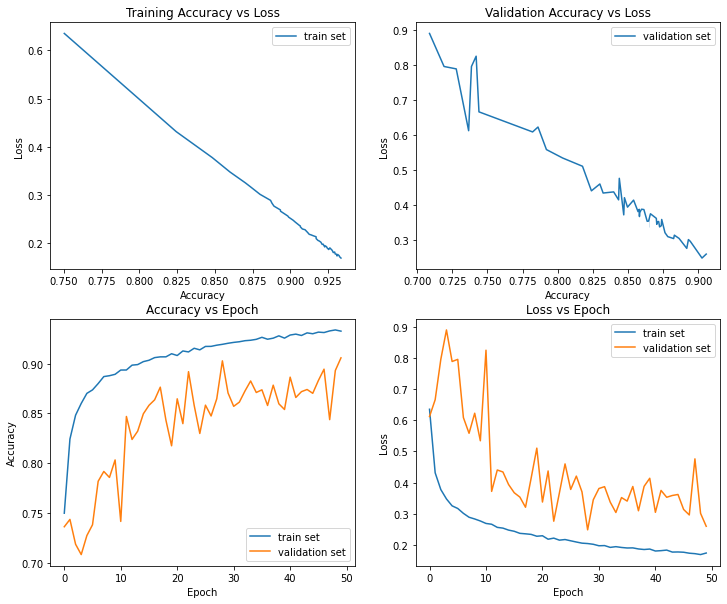

In [ ]:
accuracy_loss_plot(train_model2)

Model 3

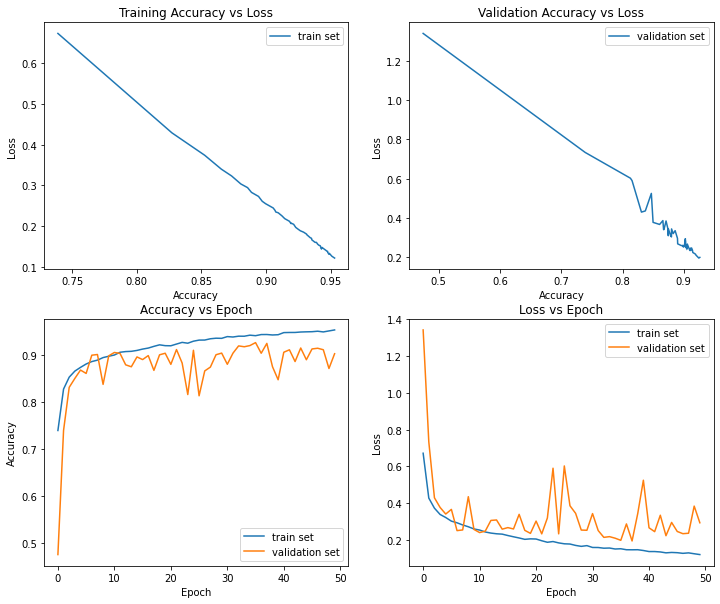

In [ ]:
accuracy_loss_plot(train_model3)

Model 4

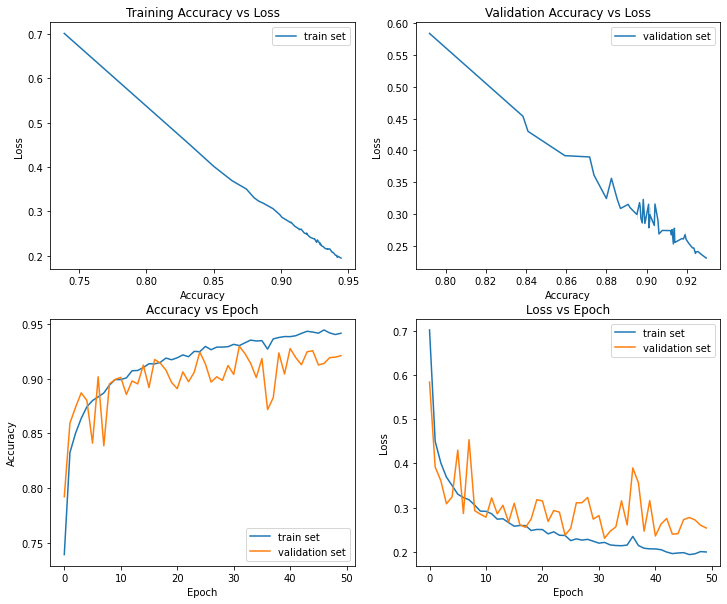

In [ ]:
accuracy_loss_plot(train_model4)

**Performance on Test set**

In [ ]:
%%time
score = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2258574664592743
Test accuracy: 0.9284999966621399
CPU times: user 566 ms, sys: 62.4 ms, total: 629 ms
Wall time: 581 ms


In [ ]:
%%time
#get the predictions for the test data
y_pred = np.argmax(model4.predict(X_test), axis=-1)

CPU times: user 522 ms, sys: 25.3 ms, total: 548 ms
Wall time: 493 ms


In [ ]:
y_test = np.argmax(y_test, axis=-1)

In [ ]:
y_test

array([2, 3, 3, ..., 4, 4, 0])

In [ ]:
from sklearn.metrics import classification_report

target_names = ["Class {}:".format(i) for i in range(1,6)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Class 1:       0.94      0.93      0.94      1178
    Class 2:       0.92      0.88      0.90      1239
    Class 3:       0.87      0.93      0.90      1207
    Class 4:       0.96      0.92      0.94      1209
    Class 5:       0.96      0.98      0.97      1167

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



The best precision is obtained for Class 5, Class 1, Class 4 and Class 2. Worst accuracy is for Class 3.

The recall is highest for Class 5, Class 4 and smallest for Class 2 and Class 3.

f1-score is highest for Class 5, Class 4 and Class 1 and smallest for Class 3 followed by Class 2.

**Kaggle Test**

In [ ]:
dataset__kaggle_test = np.load('fashion_mnist_dataset_kaggle_test.npy', allow_pickle=True).item()

In [ ]:
dataset__kaggle_test

{'features': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [ ]:
X_kaggle_test = dataset__kaggle_test['features']

In [ ]:
X_kaggle_test.shape

(10000, 28, 28)

In [ ]:
X_kaggle_test = tf.expand_dims(X_kaggle_test, axis=-1)

In [ ]:
X_kaggle_test.shape

TensorShape([10000, 28, 28, 1])

In [ ]:
#get the predictions for the test data
predicted_classes_kaggle = model4.predict_classes(X_kaggle_test)

In [ ]:
predicted_classes_kaggle

array([3, 2, 1, ..., 3, 1, 4])

In [ ]:
predicted_classes_kaggle = predicted_classes_kaggle + 1

In [ ]:
predicted_classes_kaggle

array([4, 3, 2, ..., 4, 2, 5])

In [ ]:
import csv

with open('kaggleCNN1.csv', 'w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "target"])
    
    for n in range(0,predicted_classes_kaggle.shape[0]):
        writer.writerow([n,predicted_classes_kaggle[n]])